<a href="https://colab.research.google.com/github/I3igyanh/AI_asgn/blob/main/fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.1 MB/s eta 0:00:00


In [10]:


# Define the input variables (hours worked, quality of work, deadline adherence)
hours_worked = ctrl.Antecedent(np.arange(0, 61, 1), 'hours_worked')
quality_of_work = ctrl.Antecedent(np.arange(0, 101, 1), 'quality_of_work')
deadline_adherence = ctrl.Antecedent(np.arange(0, 101, 1), 'deadline_adherence')



In [11]:
# Define the output variable (productivity)
productivity = ctrl.Consequent(np.arange(0, 101, 1), 'productivity')

# Membership functions for hours worked
hours_worked['low'] = fuzz.trimf(hours_worked.universe, [0, 0, 30])
hours_worked['moderate'] = fuzz.trimf(hours_worked.universe, [20, 40, 60])
hours_worked['high'] = fuzz.trimf(hours_worked.universe, [40, 60, 60])

# Membership functions for quality of work
quality_of_work['poor'] = fuzz.trimf(quality_of_work.universe, [0, 0, 50])
quality_of_work['average'] = fuzz.trimf(quality_of_work.universe, [30, 50, 70])
quality_of_work['excellent'] = fuzz.trimf(quality_of_work.universe, [50, 100, 100])

# Membership functions for deadline adherence
deadline_adherence['often_missed'] = fuzz.trimf(deadline_adherence.universe, [0, 0, 50])
deadline_adherence['sometimes_missed'] = fuzz.trimf(deadline_adherence.universe, [25, 50, 75])
deadline_adherence['always_met'] = fuzz.trimf(deadline_adherence.universe, [50, 100, 100])

# Membership functions for productivity
productivity['low'] = fuzz.trimf(productivity.universe, [0, 0, 50])
productivity['moderate'] = fuzz.trimf(productivity.universe, [25, 50, 75])
productivity['high'] = fuzz.trimf(productivity.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(hours_worked['high'] & quality_of_work['excellent'] & deadline_adherence['always_met'], productivity['high'])
rule2 = ctrl.Rule(hours_worked['moderate'] & quality_of_work['average'] & deadline_adherence['sometimes_missed'], productivity['moderate'])
rule3 = ctrl.Rule(hours_worked['low'] & quality_of_work['poor'] & deadline_adherence['often_missed'], productivity['low'])




In [12]:
# Create control system and simulation
productivity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
productivity_sim = ctrl.ControlSystemSimulation(productivity_ctrl)

# Example inputs: 45 hours worked, quality of work is 80, deadline adherence is 90
productivity_sim.input['hours_worked'] = 45
productivity_sim.input['quality_of_work'] = 80
productivity_sim.input['deadline_adherence'] = 90



In [13]:
# Compute the output
productivity_sim.compute()



In [15]:
# Display the output
print(f"Productivity Score: {productivity_sim.output['productivity']}")



Productivity Score: 77.97619047619047


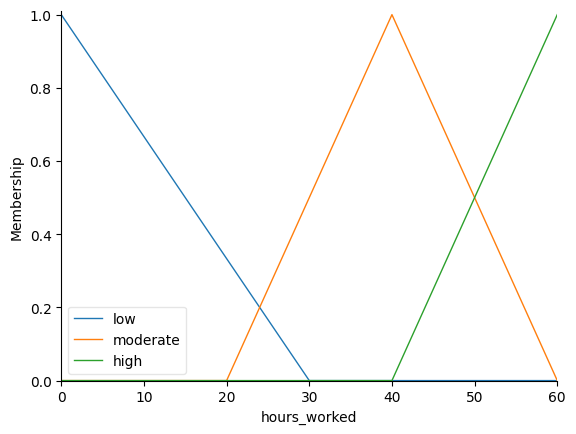

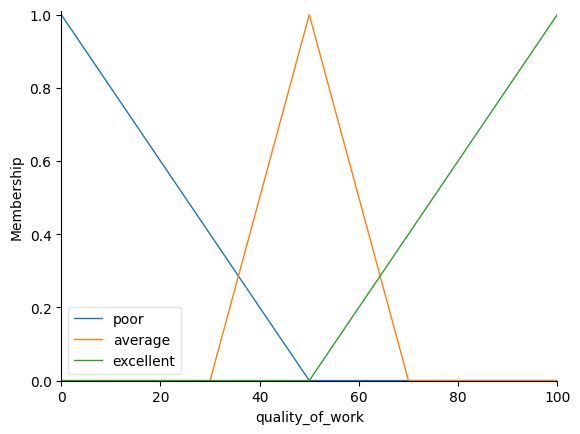

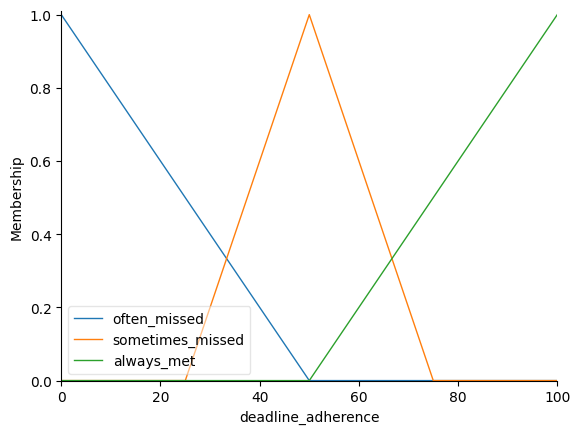

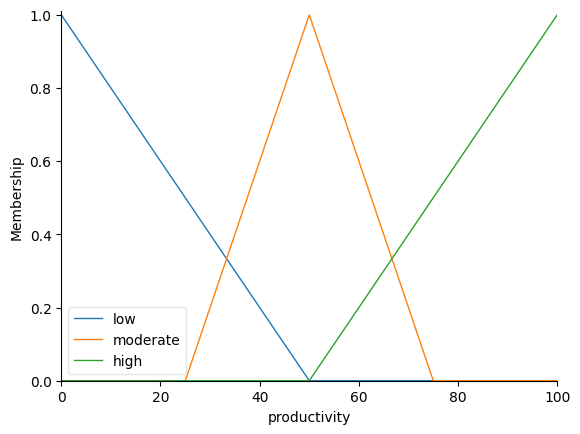

In [14]:
# Visualize the fuzzy membership functions
hours_worked.view()
quality_of_work.view()
deadline_adherence.view()
productivity.view()


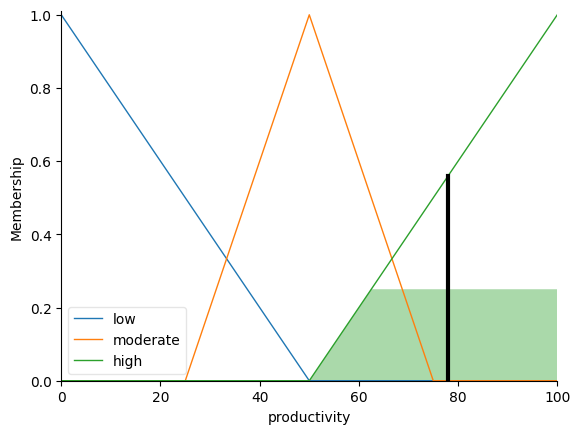

In [16]:

# Visualize the final result (aggregated output)
productivity.view(sim=productivity_sim)
plt.show()